In [1]:
import seaborn as sns
import pandas as pd
from pathlib import Path

In [2]:
path = Path("/home/ec2-user/elk-reporters/EleutherAI/pythia-1b/ag_news/dazzling-rubin")

In [3]:
list(path.glob("*"))

[PosixPath('/home/ec2-user/elk-reporters/EleutherAI/pythia-1b/ag_news/dazzling-rubin/cfg.yaml'),
 PosixPath('/home/ec2-user/elk-reporters/EleutherAI/pythia-1b/ag_news/dazzling-rubin/fingerprints.yaml'),
 PosixPath('/home/ec2-user/elk-reporters/EleutherAI/pythia-1b/ag_news/dazzling-rubin/lr_models'),
 PosixPath('/home/ec2-user/elk-reporters/EleutherAI/pythia-1b/ag_news/dazzling-rubin/reporters'),
 PosixPath('/home/ec2-user/elk-reporters/EleutherAI/pythia-1b/ag_news/dazzling-rubin/eval.csv'),
 PosixPath('/home/ec2-user/elk-reporters/EleutherAI/pythia-1b/ag_news/dazzling-rubin/lm_eval.csv'),
 PosixPath('/home/ec2-user/elk-reporters/EleutherAI/pythia-1b/ag_news/dazzling-rubin/lr_eval.csv')]

In [4]:
lm_df = pd.read_csv(path / 'lm_eval.csv')

In [5]:
lm_df.head()

,dataset,layer,ensembling,auroc_estimate,auroc_lower,auroc_upper,acc_estimate,acc_lower,acc_upper
0,ag_news,0,full,0.5031,0.4802,0.5234,0.2480,0.2200,0.2750
1,ag_news,0,none,0.5000,0.4795,0.5180,0.2277,0.2076,0.2459
2,ag_news,0,partial,0.5000,0.4945,0.5058,0.2277,0.2076,0.2459
3,ag_news,1,full,0.5031,0.4802,0.5234,0.2480,0.2200,0.2750
4,ag_news,1,none,0.5000,0.4795,0.5180,0.2277,0.2076,0.2459


In [5]:
lr_df = pd.read_csv(path / "lr_eval.csv")
lr_df.head()

,dataset,layer,ensembling,inlp_iter,auroc_estimate,auroc_lower,auroc_upper,acc_estimate,acc_lower,acc_upper
0,ag_news,0,full,0,0.5027,0.4787,0.5243,0.2520,0.2250,0.2790
1,ag_news,0,none,0,0.5027,0.4791,0.5246,0.2520,0.2250,0.2790
2,ag_news,0,partial,0,0.5027,0.4965,0.5090,0.2520,0.2250,0.2790
3,ag_news,1,full,0,0.9898,0.9861,0.9930,0.9440,0.9300,0.9580
4,ag_news,1,none,0,0.9610,0.9563,0.9653,0.8974,0.8842,0.9099


In [6]:
lr_df_full = lr_df[lr_df["ensembling"] == "full"]
lr_df_full.head()

,dataset,layer,ensembling,inlp_iter,auroc_estimate,auroc_lower,auroc_upper,acc_estimate,acc_lower,acc_upper
0,ag_news,0,full,0,0.5027,0.4787,0.5243,0.252,0.225,0.279
3,ag_news,1,full,0,0.9898,0.9861,0.9930,0.944,0.930,0.958
6,ag_news,2,full,0,0.9999,0.9997,1.0000,0.994,0.989,0.998
9,ag_news,3,full,0,0.9997,0.9995,0.9999,0.989,0.982,0.995
12,ag_news,4,full,0,0.9997,0.9994,0.9999,0.991,0.985,0.997


<Axes: xlabel='layer', ylabel='acc_estimate'>

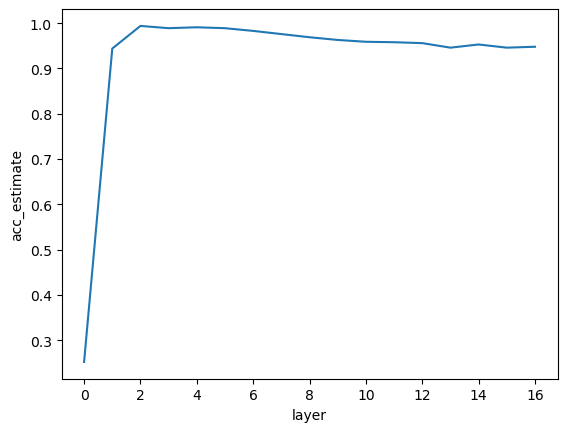

In [7]:
sns.lineplot(data=lr_df_full, x="layer", y="acc_estimate")

In [9]:
df = pd.read_csv(path / "eval.csv")
df.head()

,dataset,layer,ensembling,auroc_estimate,auroc_lower,auroc_upper,acc_estimate,acc_lower,acc_upper,pseudo_auroc,train_loss
0,ag_news,0,full,0.4987,0.4743,0.5217,0.248,0.220,0.275,0.9166,0.0539
1,ag_news,0,none,0.4985,0.4760,0.5202,0.248,0.220,0.275,0.9166,0.0539
2,ag_news,0,partial,0.4985,0.4926,0.5042,0.248,0.220,0.275,0.9166,0.0539
3,ag_news,1,full,0.4761,0.4522,0.4969,0.252,0.225,0.279,0.4582,0.0003
4,ag_news,1,none,0.4881,0.4676,0.5074,0.252,0.225,0.279,0.4582,0.0003


In [10]:
df_full = df[df['ensembling'] == 'none']
df_full.head()

,dataset,layer,ensembling,auroc_estimate,auroc_lower,auroc_upper,acc_estimate,acc_lower,acc_upper,pseudo_auroc,train_loss
1,ag_news,0,none,0.4985,0.4760,0.5202,0.248,0.2200,0.2750,0.9166,0.0539
4,ag_news,1,none,0.4881,0.4676,0.5074,0.252,0.2250,0.2790,0.4582,0.0003
7,ag_news,2,none,0.4767,0.4562,0.4968,0.252,0.2250,0.2790,0.5420,0.0003
10,ag_news,3,none,0.5086,0.4884,0.5299,0.248,0.2230,0.2750,0.5229,0.0002
13,ag_news,4,none,0.5122,0.4910,0.5344,0.248,0.2252,0.2714,0.5899,0.0002


<Axes: xlabel='layer', ylabel='train_loss'>

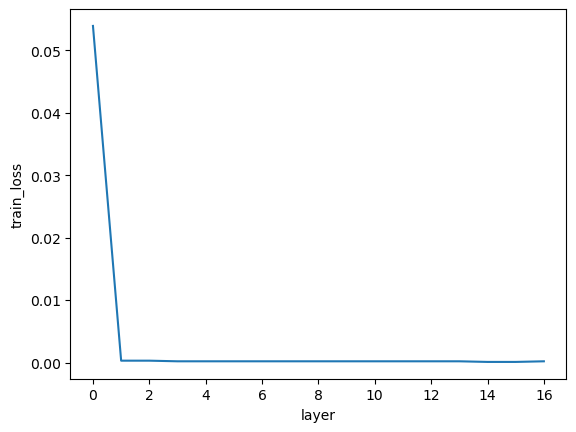

In [13]:
# plot the "acc_estimate" column
sns.lineplot(data=df_full, x="layer", y="train_loss")